
## Process

### 첫번째 csv:

    - DNN에 W2V 피쳐(EmbeddingFeaturzier & gender Cosine Similarity)를 넣었습니다.
    - 모델의 노드는 5중 for-문을 통해 GridSearchCV처럼 다양한 경우에 대해서 출력하여 가장 점수가 잘 나온 노드를 채택하였습니다.
    - 결과적으로 자체성능 5번의 평균이 0.7835가 나왔습니다.

### 두번째 csv:

    - AE에 개인과제2에서 만든 피쳐 + 대중소 구매여부를 넣어서 자체성능 0.7699가 나왔습니다.
    - DNN에는 W2V피쳐를 적용하여 3.5의 power mean을 적용하였습니다.
    - 밑에서 피쳐간의 상관관계를 보고 AE와 DNN의 결과를 앙상블하기로 하였습니다.




In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import font_manager, rc
%matplotlib inline

import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)


In [17]:
# submission간 상관관계보기

sub_ae7699 = pd.read_csv('ae_submission_0.7699.csv', encoding='cp949')
sub_dnn7835 = pd.read_csv('submission_w2v대 dnn(percentile)7835.csv', encoding='cp949')
sub_dnn_p3_5 = pd.read_csv('p3.5mean_dnn_submission_0610_2105(w2v대 dnn).csv', encoding='cp949')
sub_dnn_p4_5 = pd.read_csv('p4.5mean_dnn_submission_0610_2105(w2v대 dnn).csv', encoding='cp949')


sub_dnn_p3_5 = sub_dnn_p3_5.rename(columns={'item_id':'cust_id', 'item_cnt_month':'gender'})
sub_dnn_p4_5 = sub_dnn_p4_5.rename(columns={'item_id':'cust_id', 'item_cnt_month':'gender'})

# gender 이름 바꾸기전

submissions = [sub_ae7699, sub_dnn7835, sub_dnn_p3_5, sub_dnn_p4_5]

print(len(submissions))

names= ['sub_ae7699', 'sub_dnn7835', 'sub_dnn_p3_5', 'sub_dnn_p4_5']


# 각 submission별 gender 칼럼명 변경

for i in range(len(submissions)):
    
    submissions[i].rename(columns={'gender':f'{names[i]}'}, inplace=True)
    

In [21]:
n=1

for submission in submissions:
    
    print(n); n +=1
    
    display(submission)

1


,cust_id,sub_ae7699
0,3500,0.725714
1,3501,0.209331
2,3502,0.152227
3,3503,0.216174
4,3504,0.518582
...,...,...
2477,5977,0.661879
2478,5978,0.429824
2479,5979,0.722725
2480,5980,0.332353


2


,cust_id,sub_dnn7835
0,3500,0.601283
1,3501,0.465375
2,3502,0.313433
3,3503,0.274990
4,3504,0.555989
...,...,...
2477,5977,0.492449
2478,5978,0.362883
2479,5979,0.601283
2480,5980,0.601283


3


,cust_id,sub_dnn_p3_5
0,3500,0.695390
1,3501,0.317955
2,3502,0.281749
3,3503,0.318519
4,3504,0.401654
...,...,...
2477,5977,0.550366
2478,5978,0.269536
2479,5979,0.620129
2480,5980,0.506770


4


,cust_id,sub_dnn_p4_5
0,3500,0.698613
1,3501,0.330517
2,3502,0.289976
3,3503,0.324759
4,3504,0.410589
...,...,...
2477,5977,0.563317
2478,5978,0.285427
2479,5979,0.626458
2480,5980,0.517380


In [22]:
# 데이터 합치기

data = pd.DataFrame({'cust_id': range(3500,5982)})
for sub in submissions :
    data = pd.merge(data, sub, how='left', on='cust_id')
display(data)
data.info()

data = data.drop('cust_id', axis=1)

,cust_id,sub_ae7699,sub_dnn7835,sub_dnn_p3_5,sub_dnn_p4_5
0,3500,0.725714,0.601283,0.695390,0.698613
1,3501,0.209331,0.465375,0.317955,0.330517
2,3502,0.152227,0.313433,0.281749,0.289976
3,3503,0.216174,0.274990,0.318519,0.324759
4,3504,0.518582,0.555989,0.401654,0.410589
...,...,...,...,...,...
2477,5977,0.661879,0.492449,0.550366,0.563317
2478,5978,0.429824,0.362883,0.269536,0.285427
2479,5979,0.722725,0.601283,0.620129,0.626458
2480,5980,0.332353,0.601283,0.506770,0.517380


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2482 entries, 0 to 2481
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cust_id       2482 non-null   int64  
 1   sub_ae7699    2482 non-null   float64
 2   sub_dnn7835   2482 non-null   float64
 3   sub_dnn_p3_5  2478 non-null   float64
 4   sub_dnn_p4_5  2478 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 116.3 KB


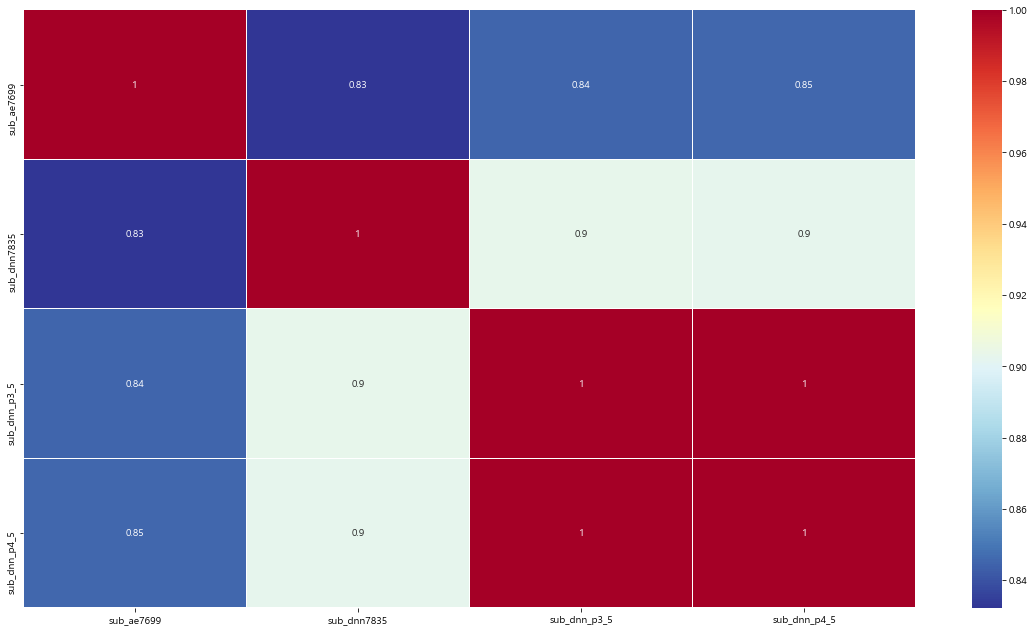

In [24]:
# 서브미션간 상관관계 히트맵

plt.figure(figsize=(20,11))
sns.heatmap(data.corr(), annot=True, cmap='RdYlBu_r', linewidths=0.2)
plt.show()

In [30]:
# 기하평균

pred = (sub_ae7699['sub_ae7699'] * sub_dnn_p3_5['sub_dnn_p3_5']) ** (1/2)

pd.DataFrame({'cust_id': range(3500, 5982), 'gender':pred}).to_csv('장성민(2).csv', index=False, encoding='cp949')